In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("../data/Salary.csv")

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


## EDA

In [5]:
df.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Count'>

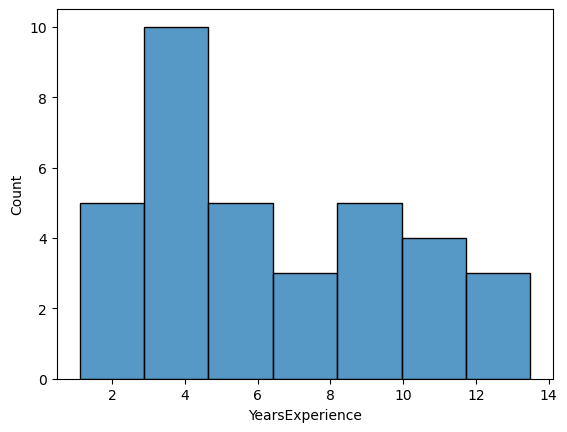

In [8]:
sns.histplot(x="YearsExperience", data=df)

<AxesSubplot:xlabel='Salary', ylabel='Count'>

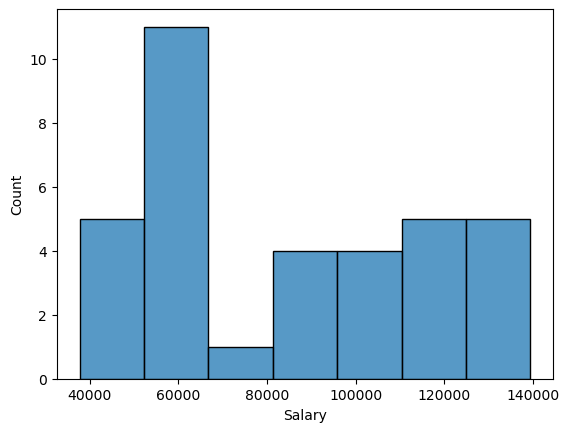

In [9]:
sns.histplot(x="Salary", data=df)

Text(0.5, 1.0, 'Years of Experience vs Salary')

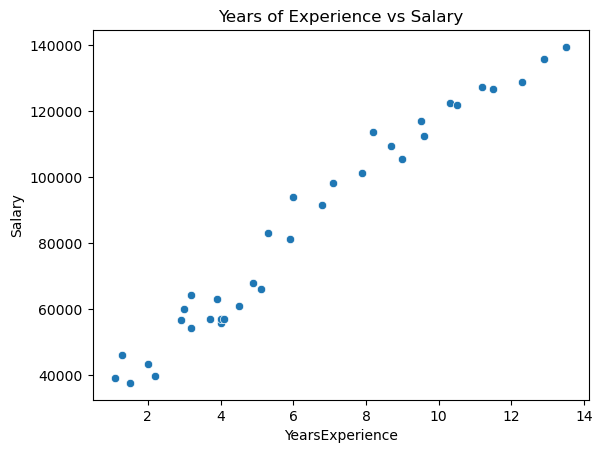

In [11]:
sns.scatterplot(x="YearsExperience", y="Salary", data=df)
plt.title("Years of Experience vs Salary")

## Model

In [12]:
X = df.YearsExperience.values.reshape(-1, 1)
y = df.Salary.values.reshape(-1, 1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)